In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
path=r'F:\mohamed\Machine Learning 2\ITI Courses\NLP course\Day 3\ner_dataset.csv'
df=pd.read_csv(path,encoding='latin1')

In [3]:
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048565 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


In [5]:
df.isnull().sum()

Sentence #    1000616
Word               10
POS                 0
Tag                 0
dtype: int64

In [6]:
# identify indexes with null in sentence column
df.iloc[np.where(df['Word'].isnull()==True)]

,Sentence #,Word,POS,Tag
197658,Sentence: 9047,NaN,NN,O
256026,Sentence: 11709,NaN,NN,O
257069,Sentence: 11759,NaN,NN,O
571211,Sentence: 26129,NaN,NN,O
613777,Sentence: 28049,NaN,NN,O
747019,Sentence: 34152,NaN,NN,O
901758,Sentence: 41181,NaN,NN,O
903054,Sentence: 41244,NaN,NN,O
944880,Sentence: 43177,NaN,NN,O
1003438,Sentence: 45887,NaN,NN,O


In [7]:
df=df.fillna(method="ffill")

In [8]:
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [9]:
print(f"unique words in corpus:{df['Word'].nunique()}")
print(f"unique Tags in corpus:{df['Tag'].nunique()}")
print(f"unique POS in corpus:{df['POS'].nunique()}")

unique words in corpus:35177
unique Tags in corpus:17
unique POS in corpus:42


In [10]:
df['POS'].unique()

array(['NNS', 'IN', 'VBP', 'VBN', 'NNP', 'TO', 'VB', 'DT', 'NN', 'CC',
       'JJ', '.', 'VBD', 'WP', '``', 'CD', 'PRP', 'VBZ', 'POS', 'VBG',
       'RB', ',', 'WRB', 'PRP$', 'MD', 'WDT', 'JJR', ':', 'JJS', 'WP$',
       'RP', 'PDT', 'NNPS', 'EX', 'RBS', 'LRB', 'RRB', '$', 'RBR', ';',
       'UH', 'FW'], dtype=object)

In [11]:
df['Tag'].unique()

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [219]:
vocab_size

35178

In [284]:
vocab=list(set(df['Word'].values))
vocab.append("ENDPAD")
vocab_size=len(vocab)

In [285]:
vocab_size

35178

In [399]:
tags = list(set(df["Tag"].values))
tags_size=len(tags)

poses = list(set(df["POS"].values))
poses_size=len(poses)

In [400]:
# to know the number of words in each sentence
df.groupby('Sentence #')['Word'].count()

Sentence #
Sentence: 1        24
Sentence: 10       25
Sentence: 100      32
Sentence: 1000     11
Sentence: 10000    35
                   ..
Sentence: 9995     32
Sentence: 9996     25
Sentence: 9997     27
Sentence: 9998     21
Sentence: 9999     32
Name: Word, Length: 47959, dtype: int64

In [401]:
# prepare sentences
agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]

In [402]:
grouped=df.groupby('Sentence #').apply(agg_func)

In [403]:
grouped

Sentence #
Sentence: 1        [(Thousands, NNS, O), (of, IN, O), (demonstrat...
Sentence: 10       [(Iranian, JJ, B-gpe), (officials, NNS, O), (s...
Sentence: 100      [(Helicopter, NN, O), (gunships, NNS, O), (Sat...
Sentence: 1000     [(They, PRP, O), (left, VBD, O), (after, IN, O...
Sentence: 10000    [(U.N., NNP, B-geo), (relief, NN, O), (coordin...
                                         ...                        
Sentence: 9995     [(Opposition, NNP, O), (leader, NN, O), (Mir, ...
Sentence: 9996     [(On, IN, O), (Thursday, NNP, B-tim), (,, ,, O...
Sentence: 9997     [(Following, VBG, O), (Iran, NNP, B-geo), ('s,...
Sentence: 9998     [(Since, IN, O), (then, RB, O), (,, ,, O), (au...
Sentence: 9999     [(The, DT, O), (United, NNP, B-org), (Nations,...
Length: 47959, dtype: object

In [404]:
sentences = [s for s in grouped]

In [405]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

<Axes: >

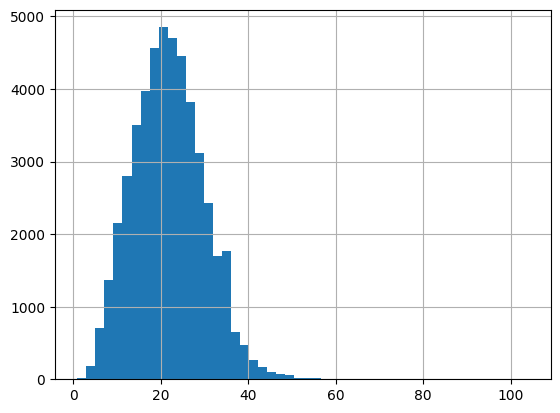

In [406]:
# plot # of words per senctence so we could choose maxlen for help in padding
df.groupby('Sentence #')['Word'].count().hist(bins=50)

In [407]:
def get_longest_sequence(sents):
    longest=0
    s=0
    for sent in sents:
        sent_len=len(sent)
        longest=max(sent_len,longest)
        if sent_len == longest:
            s= sent
    return longest ,s

In [498]:
longest_input,s=get_longest_sequence(sentences)
longest_input

104

In [499]:
maxlen=50

In [500]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [501]:
word2idx={v:k+1 for k,v in enumerate(vocab)}

In [502]:
tag2idx={v:k for k,v in enumerate(tags)}
pos2idx={v:k for k,v in enumerate(poses)}

In [503]:
X=[[word2idx[w[0]]for w in s] for s in sentences]
y=[[tag2idx[w[2]]for w in s] for s in sentences]
y2=[[pos2idx[w[1]]for w in s] for s in sentences]

In [504]:
sentences[0][0]

('Thousands', 'NNS', 'O')

In [505]:
padded_sequences=pad_sequences(X,padding='post',maxlen=maxlen,value=vocab_size-1)

In [509]:
y_ner=pad_sequences(y,padding='post',maxlen=maxlen,value=tag2idx['O'])
y_pos=pad_sequences(y2,padding='post',maxlen=maxlen,value=pos2idx['UH'])

In [510]:
padded_sequences

array([[23739, 24279, 35035, ..., 35177, 35177, 35177],
       [30746,  4272, 30736, ..., 35177, 35177, 35177],
       [34772, 22866, 22022, ..., 35177, 35177, 35177],
       ...,
       [10930, 27744, 20756, ..., 35177, 35177, 35177],
       [16632, 12496, 15314, ..., 35177, 35177, 35177],
       [15310,  3482, 21558, ..., 35177, 35177, 35177]],
      shape=(47959, 50), dtype=int32)

In [511]:
from sklearn.model_selection import train_test_split

In [515]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_pos_train, y_pos_val, y_ner_train, y_ner_val = train_test_split(
    padded_sequences, y_pos, y_ner, test_size=0.2, random_state=42
)

# Building BI-directional LSTM Model

In [422]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, Bidirectional

In [423]:
tags_size

17

In [520]:
input_word = Input(shape=(maxlen,))
x = Embedding(input_dim=vocab_size, output_dim=80, input_length=maxlen)(input_word)
x = Bidirectional(LSTM(units=64, return_sequences=True))(x)

ner_output = TimeDistributed(Dense(tags_size, activation="softmax"),name='ner')(x)
pos_output = TimeDistributed(Dense(poses_size, activation="softmax"),name='pos')(x)

model = Model(inputs=input_word,outputs=[ner_output,pos_output])
model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 50)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_10 (Embedding)      │ (None, 50, 80)            │       2,814,240 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_10              │ (None, 50, 128)           │          74,240 │ embedding_10[0][0]         │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ ner (TimeDistributed)         │ (None, 50, 17)            │           2,193 │ bidirectional_10[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pos (TimeDistributed)         │ (None, 50, 42)            │           5,418 │ bidirectional_10[0][0]     │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 2,896,091 (11.05 MB)

 Trainable params: 2,896,091 (11.05 MB)

 Non-trainable params: 0 (0.00 B)

# Training Phase

In [524]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback


chkpt = ModelCheckpoint("ner_model.weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)
callbacks = [PlotLossesCallback(), chkpt, early_stopping]

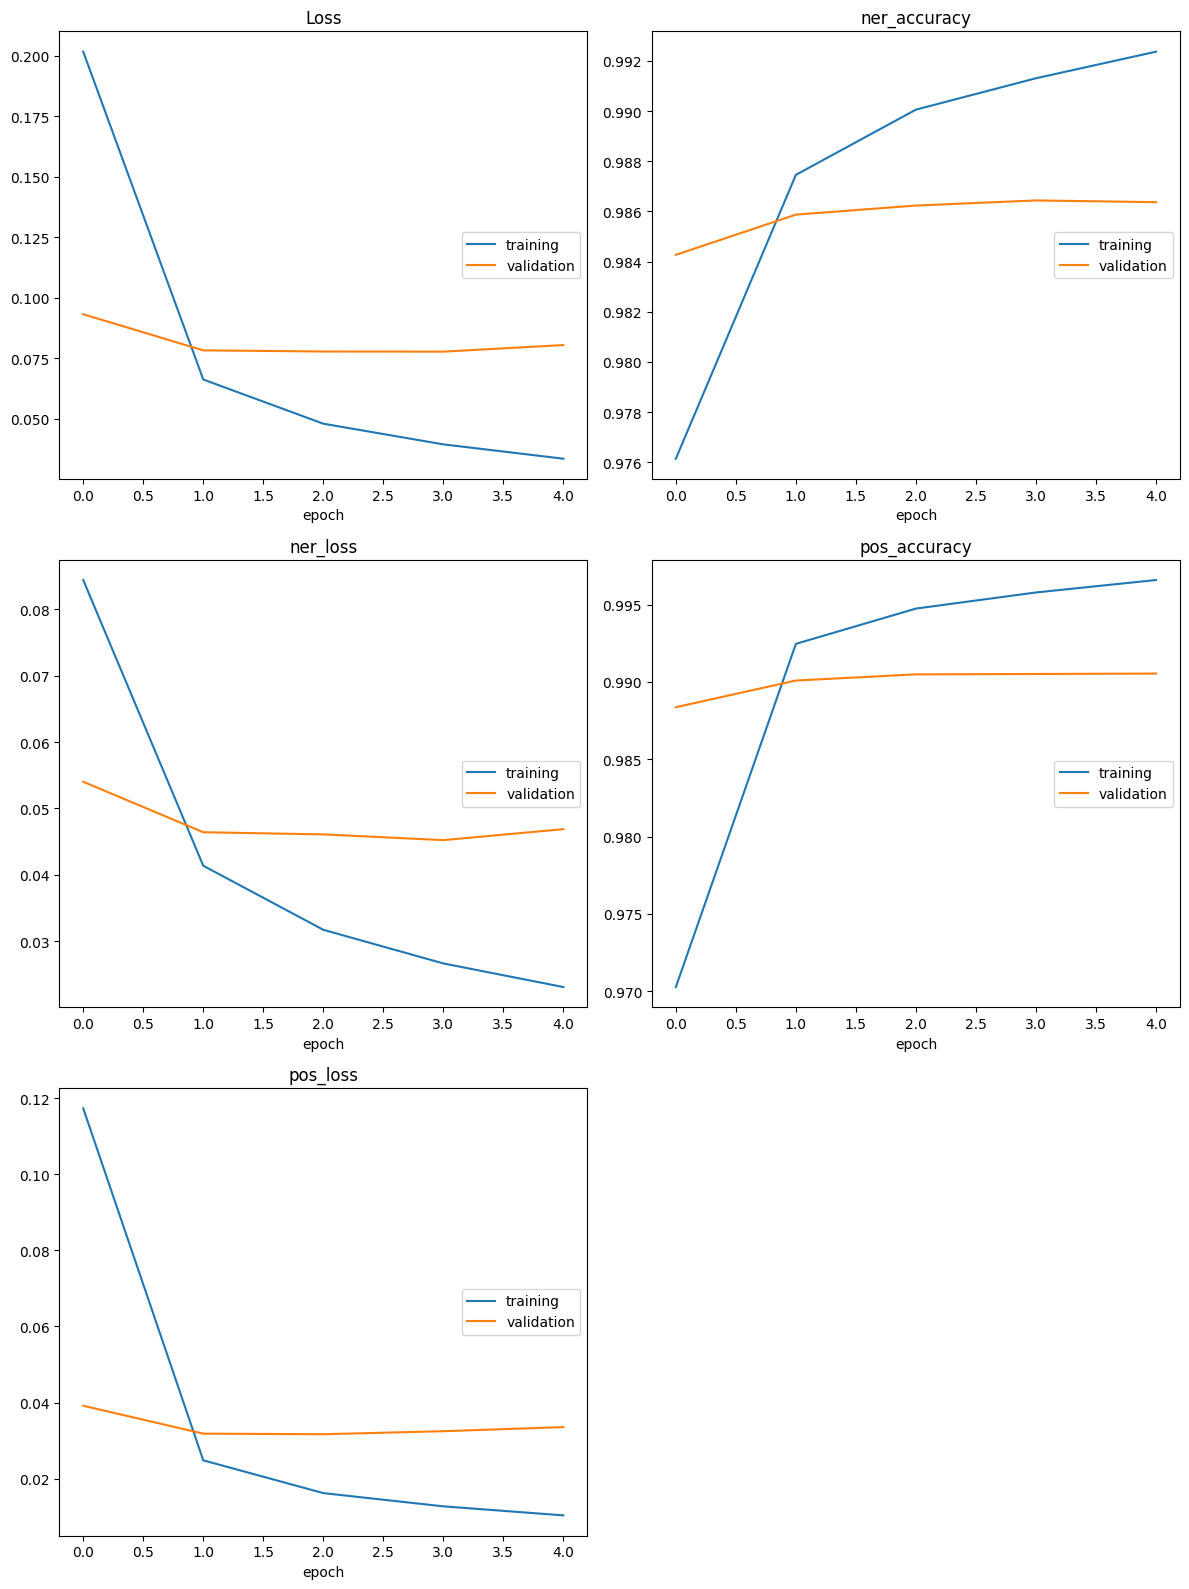

Loss
	training         	 (min:    0.033, max:    0.202, cur:    0.033)
	validation       	 (min:    0.078, max:    0.093, cur:    0.080)
ner_accuracy
	training         	 (min:    0.976, max:    0.992, cur:    0.992)
	validation       	 (min:    0.984, max:    0.986, cur:    0.986)
ner_loss
	training         	 (min:    0.023, max:    0.084, cur:    0.023)
	validation       	 (min:    0.045, max:    0.054, cur:    0.047)
pos_accuracy
	training         	 (min:    0.970, max:    0.997, cur:    0.997)
	validation       	 (min:    0.988, max:    0.991, cur:    0.991)
pos_loss
	training         	 (min:    0.010, max:    0.117, cur:    0.010)
	validation       	 (min:    0.032, max:    0.039, cur:    0.034)

Epoch 5: val_loss did not improve from 0.07772
1199/1199 ━━━━━━━━━━━━━━━━━━━━ 67s 55ms/step - loss: 0.0335 - ner_accuracy: 0.9924 - ner_loss: 0.0231 - pos_accuracy: 0.9966 - pos_loss: 0.0104 - val_loss: 0.0804 - val_ner_accuracy: 0.9864 - val_ner_loss: 0.0469 - val_pos_accuracy: 0.9905 - v

In [525]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy','accuracy'])

model.fit(
    X_train,
    {'pos': y_pos_train,'ner': y_ner_train},
    validation_data=(X_val,{'pos': y_pos_val, 'ner': y_ner_val}),
    batch_size=32,epochs=5,callbacks=callbacks,verbose=1
)

## model evaluation

In [584]:
model.evaluate(X_val,{'pos': y_pos_val, 'ner': y_ner_val})

300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0804 - ner_accuracy: 0.9864 - ner_loss: 0.0469 - pos_accuracy: 0.9905 - pos_loss: 0.0336 


[0.0804358720779419,
 0.046877674758434296,
 0.033556729555130005,
 0.9863701462745667,
 0.9905364513397217]

In [585]:
y_pos_pred,y_ner_pred = model.predict(X_val)

300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 


## Save model and necessary paramters 

In [527]:
model.save('./ner-AND-pos_model.h5')

In [586]:
import joblib
joblib.dump(word2idx, 'word2idx.joblib', compress=9)
joblib.dump(tag2idx, 'tag2idx.joblib', compress=9)
joblib.dump(pos2idx, 'pos2idx.joblib', compress=9)

['pos2idx.joblib']

# Fast Prediction on new data

In [65]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from spacy import displacy
import joblib
word2idx=joblib.load('word2idx.joblib')
tag2idx=joblib.load('tag2idx.joblib')
pos2idx=joblib.load('pos2idx.joblib')

def Predict(text):
    
    max_len=50
    text_len=len(text.split())
    tokens=text.split()
    
    text=[[word2idx.get(w,0) for w in tokens]]
    text = pad_sequences(maxlen=max_len, sequences=text, padding="post", value=len(word2idx)-1)
    y_ner_pred,y_pos_pred =all_model.predict(np.array(text))
    # ----------------------------
    

    idx2pos={v:i for i,v in pos2idx.items()}
    idx2tag={v:i for i,v in tag2idx.items()}
    
    y_pos_pred=np.argmax(y_pos_pred,axis=-1)
    pred_poses=[idx2pos[i] for i in y_pos_pred[0]][:text_len]
    # ----------------------------
    y_ner_pred=np.argmax(y_ner_pred,axis=-1)
    pred_tags=[idx2tag[i] for i in y_ner_pred[0]][:text_len]

    print("{:15}\t{}\t\t{}".format("Word", "Tag","POS"))
    print("-" *30)
    
    # show entities using displacy rendering
    for word,tag,pos in zip(tokens,pred_tags,pred_poses):
        print("{:15}\t{}\t\t{}".format(word, tag, pos))

    ents = []
    start = 0
    for word, tag in zip(tokens, pred_tags):
        end = start + len(word)
        if tag != 'O':
            ents.append({"start": start, "end": end, "label": tag})
        start = end + 1  
    
    data = {
        "text": ' '.join(tokens),
        "ents": ents,
        "title": None
    }
    
    displacy.render([data], style='ent', manual=True, jupyter=True)

In [66]:
all_model=tf.keras.models.load_model('ner-AND-pos_model.h5')

In [67]:
# text_t="hello my name is mohamed i am from Egypt the country of the Pyramids"
Predict("this is Cairo from Egypt")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 953ms/step
Word           	Tag		POS
------------------------------
this           	O		DT
is             	O		VBZ
Cairo          	B-geo		NNP
from           	O		IN
Egypt          	B-geo		NNP


In [68]:
Predict("My name is Mohammed , and my father name is Mahmoud I come from Egypt which is the Cradle of Civilization")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Word           	Tag		POS
------------------------------
My             	O		PRP$
name           	O		NN
is             	O		VBZ
Mohammed       	B-per		NNP
,              	O		,
and            	O		CC
my             	O		PRP$
father         	O		NN
name           	O		NN
is             	O		VBZ
Mahmoud        	B-per		NNP
I              	O		PRP
come           	O		VBP
from           	O		IN
Egypt          	B-geo		NNP
which          	O		WDT
is             	O		VBZ
the            	O		DT
Cradle         	O		NN
of             	O		IN
Civilization   	O		NN


In [624]:
Predict("My sister Sarah lives in Alexandria , Egypt .")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Word           	Tag		POS
------------------------------
My             	O		PRP$
sister         	O		NN
Sarah          	B-per		NNP
lives          	O		VBZ
in             	O		IN
Alexandria     	B-geo		NNP
,              	O		,
Egypt          	B-geo		NNP
.              	O		.


# Deployment using Gradio

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import numpy as np

word2idx=joblib.load('word2idx.joblib')
tag2idx=joblib.load('tag2idx.joblib')
pos2idx=joblib.load('pos2idx.joblib')
import tensorflow as tf
all_model=tf.keras.models.load_model('ner-AND-pos_model.h5')

def Predict_deploy(text):
    
    max_len=50
    text_len=len(text.split())
    tokens=text.split()

        
    text=[[word2idx.get(w,0) for w in tokens]]
    text = pad_sequences(maxlen=max_len, sequences=text, padding="post", value=len(word2idx)-1)
    y_ner_pred,y_pos_pred =all_model.predict(np.array(text))
    # ----------------------------

    idx2pos={v:i for i,v in pos2idx.items()}
    idx2tag={v:i for i,v in tag2idx.items()}
    
    y_pos_pred=np.argmax(y_pos_pred,axis=-1)
    pred_poses=[idx2pos[i] for i in y_pos_pred[0]][:text_len]
    # ----------------------------
    y_ner_pred=np.argmax(y_ner_pred,axis=-1)
    pred_tags=[idx2tag[i] for i in y_ner_pred[0]][:text_len]
    # ----------------------------

    # Prepare dataframes

    NER_COLORS = {
    "B-per": "#FFD166",
    "I-per": "#FFE59A",
    "B-geo": "#06D6A0",
    "I-geo": "#72EFDD",
    "B-org": "#EF476F",
    "I-org": "#F78C6B",
    "O": "#FFFFFF",
}

    pos_table = [[t, p] for t, p in zip(tokens, pred_poses)]
    ner_table = [[t, n] for t, n in zip(tokens, pred_tags)]
    # -------------------------

    # Create colored HTML for NER
    highlighted_text = ""
    for token, tag in zip(tokens, pred_tags):
        color = NER_COLORS.get(tag, "#DDDDDD")
        if tag != "O":
            highlighted_text += f"<span style='background-color:{color}; padding:3px; border-radius:4px; margin:2px'>{token} <sub><b>{tag}</b></sub></span> "
        else:
            highlighted_text += f"{token} "

    return highlighted_text.strip(), pos_table, ner_table
    
Predict_deploy("My sister Sarah lives in Alexandria , Egypt .")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step


("My sister <span style='background-color:#FFD166; padding:3px; border-radius:4px; margin:2px'>Sarah <sub><b>B-per</b></sub></span> lives in <span style='background-color:#06D6A0; padding:3px; border-radius:4px; margin:2px'>Alexandria <sub><b>B-geo</b></sub></span> , <span style='background-color:#06D6A0; padding:3px; border-radius:4px; margin:2px'>Egypt <sub><b>B-geo</b></sub></span> .",
 [['My', 'PRP$'],
  ['sister', 'NN'],
  ['Sarah', 'NNP'],
  ['lives', 'VBZ'],
  ['in', 'IN'],
  ['Alexandria', 'NNP'],
  [',', ','],
  ['Egypt', 'NNP'],
  ['.', '.']],
 [['My', 'O'],
  ['sister', 'O'],
  ['Sarah', 'B-per'],
  ['lives', 'O'],
  ['in', 'O'],
  ['Alexandria', 'B-geo'],
  [',', 'O'],
  ['Egypt', 'B-geo'],
  ['.', 'O']])

In [52]:
# pip install --upgrade gradio

In [6]:
 # ------------------ Gradio Interface ------------------
import gradio as gr

with gr.Blocks(theme="soft") as demo:
    gr.Markdown("## 🧠 POS + NER Tagger (Custom BiLSTM Model)")
    gr.Markdown("Enter text to see both <b>Part-of-Speech (POS)</b> and <b>Named Entity Recognition (NER)</b> results.")

    text_input = gr.Textbox(
        lines=3,
        label="Input Sentence",
        placeholder="Example: My name is Mohammed Mahmoud I come from Egypt"
    )

    ner_viz = gr.HTML(label="Highlighted NER Text")

    with gr.Row():
        pos_output = gr.Dataframe(headers=["Token", "POS Tag"], label="Predicted POS Tags", wrap=True)
        ner_output = gr.Dataframe(headers=["Token", "NER Tag"], label="Predicted NER Tags", wrap=True)

    submit_btn = gr.Button("🔍 Predict")
    submit_btn.click(Predict_deploy, inputs=text_input, outputs=[ner_viz, pos_output, ner_output])

    gr.Examples(
        examples=[
            ["My sister Sarah lives in Alexandria , Egypt ."],
            ["My name is Mohammed Mahmoud I come from Egypt . Contact me on mhmedmhmod184@gmail.com"],
            ["Cairo is the capital of Egypt ."],
            ["Ahmed works for Microsoft in Dubai ."]
        ],
        inputs=text_input
    )

# ------------------ Launch ------------------
if __name__ == "__main__":
    demo.launch()

* Running on local URL:  http://127.0.0.1:7889
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
